In [19]:
from binding.model.elements import Element
from figures.phase import PhaseDiagram, TitrationContours, OverallTitrationContours
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import gridspec
import numpy as np

%reload_ext autoreload
%autoreload 2

# Figure 3 B,C

In [2]:
# define binding energies (energies in kcal/mole, ordered [Pnt,Yan])
a0, b0, c0 = -9.955, -5.837, -7.043
alpha = [a0*2, a0*2] 
beta = [b0*2, b0*2] 
gamma = [0, 0]
binding_energies = dict(alpha=alpha, beta=beta, gamma=gamma)

# define binding element size and configuration
element_size = 12
strong_sites = (0,)

# instantiate binding element
element = Element(Ns=element_size, params=binding_energies, ets=strong_sites)

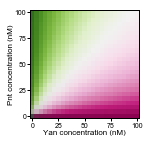

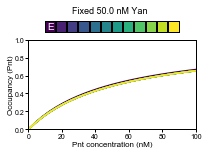

In [3]:
# Figure 3B
Fig3B = PhaseDiagram(element)
Fig3B.render()

# Figure 3C
Fig3C = TitrationContours(element)
Fig3C.render(yan_level=50)

# Figure 3 E,F

In [4]:
# define binding energies (energies in kcal/mole, ordered [Yan, Pnt])
a0, b0, c0 = -9.955, -5.837, -7.043
scaling = 0.68

alpha = [a0, .96*(a0+c0)*scaling] 
beta = [b0, .96*(b0+c0)*scaling] 
gamma = [c0, 0]
binding_energies = dict(alpha=alpha, beta=beta, gamma=gamma)

# define binding element size and configuration
element_size = 12
strong_sites = (0,)

# instantiate binding element
element = Element(Ns=element_size, params=binding_energies, ets=strong_sites)

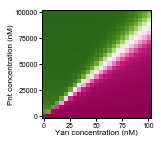

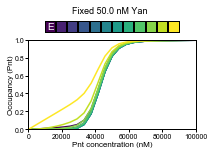

In [5]:
# Figure 3E
Fig3E = PhaseDiagram(element)
Fig3E.render(cmin=(0, 0), cmax=(100, 100000))
#Fig3E.fig.savefig('../manuscript/submitted/elife_100718/rebuttal/phase_diagram.png', dpi=300, bbox_inches='tight')

# # Figure 3F
Fig3F = TitrationContours(element)
Fig3F.render(yan_level=50, cmin=0, cmax=100000)

# Figure S4

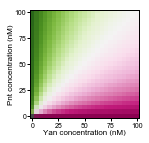

In [7]:
# element=None defaults to simple binding model
FigS4 = PhaseDiagram(element=None)
FigS4.render()

# Figure S5

In [25]:
# define binding energies (energies in kcal/mole, ordered [Yan, Pnt])
a0, b0, c0 = -9.955, -5.837, -7.043
scaling = 1

alpha = [a0, .96*(a0+c0)*scaling] 
beta = [b0, .96*(b0+c0)*scaling] 
gamma = [c0, 0]
binding_energies = dict(alpha=alpha, beta=beta, gamma=gamma)

# Varying density of ETS sites

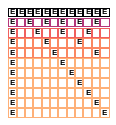

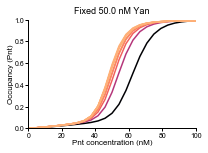

In [50]:
# define elements
Ns = 12
kwargs = dict(Ns=Ns, params=binding_energies)
elements = [Element(ets=list(range(0, Ns, n+1)), **kwargs) for n in range(Ns-1)]

# define contour colors
norm = Normalize(0, 1)
densities = [sum(e.ets)/e.Ns for e in elements]
colors = [plt.cm.magma_r(norm(d)) for d in densities]

# visualize elements
fig_grid = plt.figure(figsize=(2, 2))
gs = gridspec.GridSpec(nrows=len(elements), ncols=1, hspace=.2)
for i, element in enumerate(elements):
    ax = plt.subplot(gs[i])
    element.show(color=colors[i], ax=ax)
fig_grid.savefig('./graphics/density_grid.pdf', dpi=300, bbox_inches='tight', transparent=True)

# plot titration contours
fig = OverallTitrationContours(*elements)
fig.render(cmax=100, colors=colors)
fig.fig.savefig('./graphics/density_titration.pdf', dpi=300, bbox_inches='tight', transparent=True)

# Varying proximity of ETS sites

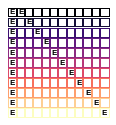

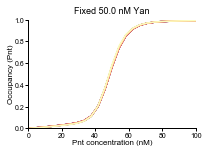

In [49]:
Ns = 12
kwargs = dict(Ns=Ns, params=binding_energies)
elements = [Element(ets=[0, n+1], **kwargs) for n in range(Ns-1)]

# define contour colors
norm = Normalize(1, 11)
proximities = [np.diff(np.where(e.ets.tolist())[0])[0] for e in elements]
colors = [plt.cm.magma(norm(p)) for p in proximities]

# visualize elements
fig_grid = plt.figure(figsize=(2, 2))
gs = gridspec.GridSpec(nrows=len(elements), ncols=1, hspace=.2)
for i, element in enumerate(elements):
    ax = plt.subplot(gs[i])
    element.show(color=colors[i], ax=ax)
fig_grid.savefig('./graphics/proximity_grid.pdf', dpi=300, bbox_inches='tight', transparent=True)

# plot titration contours
fig = OverallTitrationContours(*elements)
fig.render(cmax=100, colors=colors)
fig.fig.savefig('./graphics/proximity_titration.pdf', dpi=300, bbox_inches='tight', transparent=True)

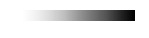

In [68]:
fig, ax = plt.subplots(figsize=(2, 2))

x = np.arange(0, 1, .001)
im = np.tile(x, (100, 1))
ax.set_aspect(1)
ax.imshow(im, cmap=plt.cm.Greys)
ax.axis('off')

fig.savefig('scalebar.pdf', dpi=300, transparent=True)

In [70]:
im

array([[0.   , 0.001, 0.002, ..., 0.997, 0.998, 0.999],
       [0.   , 0.001, 0.002, ..., 0.997, 0.998, 0.999],
       [0.   , 0.001, 0.002, ..., 0.997, 0.998, 0.999],
       ...,
       [0.   , 0.001, 0.002, ..., 0.997, 0.998, 0.999],
       [0.   , 0.001, 0.002, ..., 0.997, 0.998, 0.999],
       [0.   , 0.001, 0.002, ..., 0.997, 0.998, 0.999]])

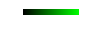

In [88]:
im3 = np.swapaxes(np.stack((np.zeros_like(im), im, np.zeros_like(im))).T, 0, 1)

fig, ax = plt.subplots(figsize=(1, .2))

ax.set_aspect(1)
ax.imshow(im3, cmap=plt.cm.Greys, rasterized=True)
ax.axis('off')

fig.savefig('scalebar_g.pdf', dpi=300, transparent=True, rasterized=True)